In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation
import warnings;warnings.filterwarnings(action='ignore')

In [2]:
image_size = 32
num_channels = 3
num_features = image_size * image_size * num_channels
num_classes = 10

num_train = 49000

# Load CIFAR10 Dataset

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f'Train data shape: {X_train.shape}')
print(f'Test  data shape: {X_test.shape}')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Train data shape: (50000, 32, 32, 3)
Test  data shape: (10000, 32, 32, 3)


## Data Visualization

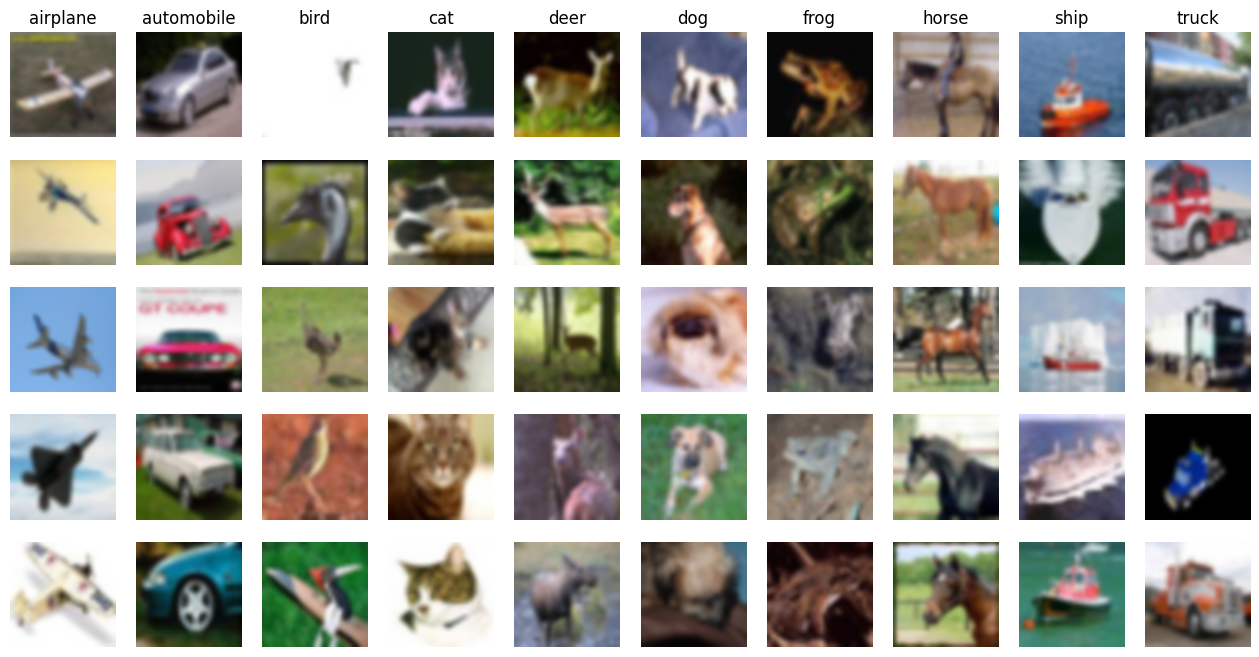

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
samples_per_class = 5

plt.figure(figsize=(16, 8))

for cls, name in enumerate(class_names):
    idxs = np.flatnonzero(y_train == cls)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + cls + 1 # cls=0 -> (1, 11,...,61), cls=2 -> (2, 12,...,62),...,cls=9 ->(10, 20,...,70)
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx], interpolation='bicubic') # Interpolation used to smooth the appearance of plotted data
        plt.axis('off')
        if i == 0:
            plt.title(class_names[cls])

## Data Preprocessing

In [5]:
# Convert 4D arrays to 2D arrays
X_train = X_train.reshape([-1, num_features]) # num_features=3072
X_test  =  X_test.reshape([-1, num_features])

print(f'Train data shape: {X_train.shape}')
print(f'Test  data shape: {X_test.shape}')

Train data shape: (50000, 3072)
Test  data shape: (10000, 3072)


In [6]:
# convert pixel range from [0, 255] to [0., 1.]
X_train = X_train.astype('float32')
x_test  = X_test.astype('float32')

mu = np.mean(X_train, axis=0)

X_train -= mu
X_train /= 255.0

x_test -= mu
x_test /= 255.0

## One-hot encodding
- We have 10 classes: 0, 1, ..., 9

In one-hot encoding, we represent labels using vectors.

```python
0: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
.
.
.
9: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
```

In [7]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test,  num_classes)

print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


# Linear Classifier

## $$f(x, W, b) = Wx+b$$

<img src="imgs/linear_classifier.jpg" width="75%"/>

__creating a simple neural network with one layer__

In [8]:
model = Sequential()  # a sequence of layers (from keras.models import Sequential)
model.add(Dense(num_classes, input_shape=(num_features,), activation='softmax')) # add Dense hidden layer with 10 neurons

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │          30,730 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,730 (120.04 KB)

 Trainable params: 30,730 (120.04 KB)

 Non-trainable params: 0 (0.00 B)

## Train Model

In [10]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(X_train[:num_train], y_train[:num_train],
                    batch_size=512,
                    epochs=15,
                    verbose=2,
                    validation_data=(X_train[num_train:], y_train[num_train:]),
                    shuffle=True)

Epoch 1/15
96/96 - 2s - 23ms/step - accuracy: 0.2288 - loss: 2.1295 - val_accuracy: 0.2960 - val_loss: 2.0263
Epoch 2/15
96/96 - 2s - 17ms/step - accuracy: 0.3032 - loss: 1.9789 - val_accuracy: 0.3420 - val_loss: 1.9501
Epoch 3/15
96/96 - 3s - 28ms/step - accuracy: 0.3309 - loss: 1.9224 - val_accuracy: 0.3490 - val_loss: 1.9108
Epoch 4/15
96/96 - 2s - 21ms/step - accuracy: 0.3467 - loss: 1.8893 - val_accuracy: 0.3660 - val_loss: 1.8856
Epoch 5/15
96/96 - 1s - 15ms/step - accuracy: 0.3558 - loss: 1.8668 - val_accuracy: 0.3720 - val_loss: 1.8683
Epoch 6/15
96/96 - 3s - 28ms/step - accuracy: 0.3630 - loss: 1.8500 - val_accuracy: 0.3820 - val_loss: 1.8544
Epoch 7/15
96/96 - 2s - 25ms/step - accuracy: 0.3682 - loss: 1.8366 - val_accuracy: 0.3860 - val_loss: 1.8437
Epoch 8/15
96/96 - 1s - 12ms/step - accuracy: 0.3727 - loss: 1.8259 - val_accuracy: 0.3850 - val_loss: 1.8339
Epoch 9/15
96/96 - 1s - 15ms/step - accuracy: 0.3761 - loss: 1.8167 - val_accuracy: 0.3940 - val_loss: 1.8278
Epoch 10/1

In [12]:
model.save('Linear-model.h5')

In [13]:
history.history

{'accuracy': [0.22879591584205627,
  0.30320408940315247,
  0.33085715770721436,
  0.3467347025871277,
  0.35577550530433655,
  0.3630000054836273,
  0.3682040870189667,
  0.37267348170280457,
  0.3761020302772522,
  0.38036733865737915,
  0.3825102150440216,
  0.38475510478019714,
  0.38724491000175476,
  0.38977551460266113,
  0.3907347023487091],
 'loss': [2.129530906677246,
  1.978865146636963,
  1.922408938407898,
  1.889309048652649,
  1.8667888641357422,
  1.8499983549118042,
  1.8366200923919678,
  1.825947880744934,
  1.8167307376861572,
  1.8088767528533936,
  1.802019715309143,
  1.795924425125122,
  1.7905758619308472,
  1.7856906652450562,
  1.7811923027038574],
 'val_accuracy': [0.29600000381469727,
  0.34200000762939453,
  0.3490000069141388,
  0.3659999966621399,
  0.3720000088214874,
  0.38199999928474426,
  0.38600000739097595,
  0.38499999046325684,
  0.39399999380111694,
  0.3970000147819519,
  0.40299999713897705,
  0.40299999713897705,
  0.4020000100135803,
  0.40

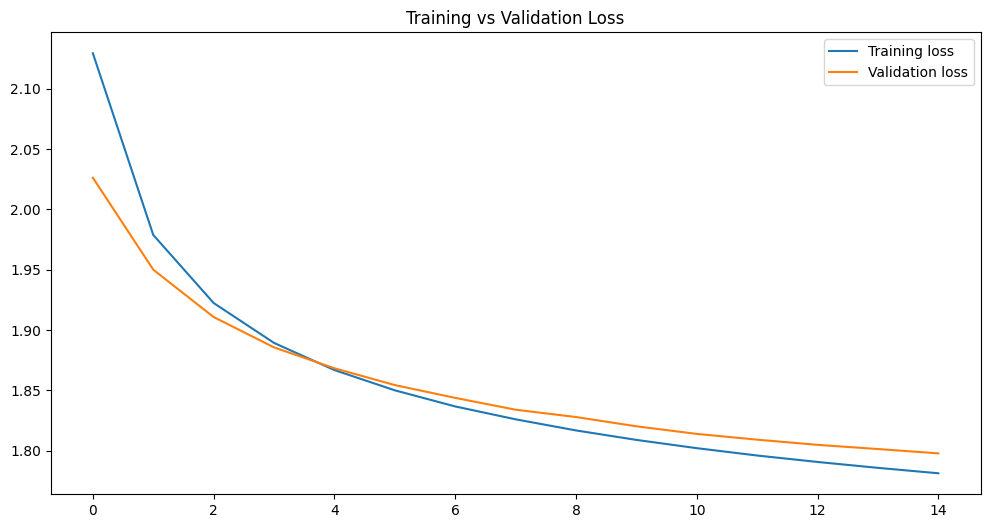

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

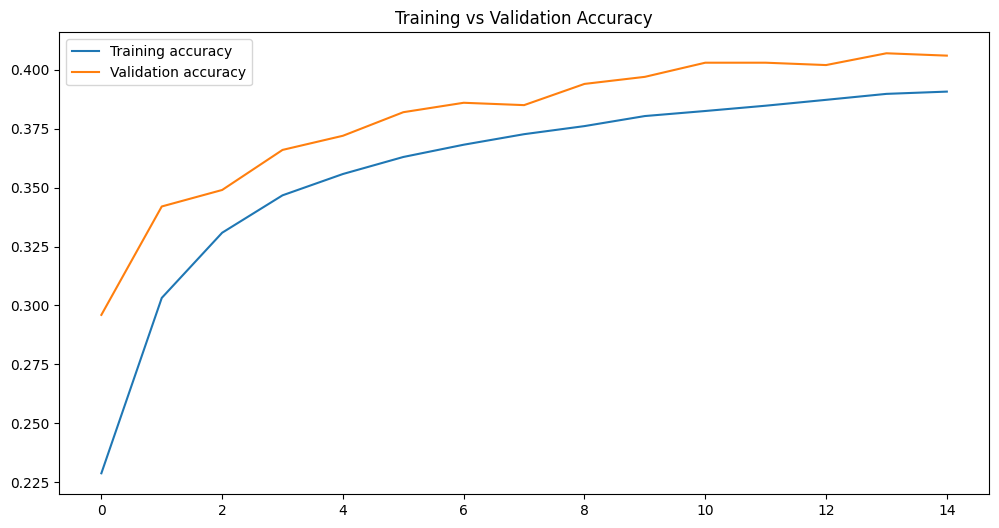

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

## Predicting class for new images

In [16]:
# Select 25 random images from test images
idx = np.random.choice(x_test.shape[0], 25, replace=False)

# predict class for selected images
y_pred = model.predict(x_test[idx]).argmax(axis=1)

# True class for selected images
y_true = y_test[idx].argmax(axis=1)

print('Test Accuracy = %.2f' % (100.0 * np.mean(y_pred == y_true)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Test Accuracy = 40.00


In [17]:
len(X_test[idx[0]])

3072

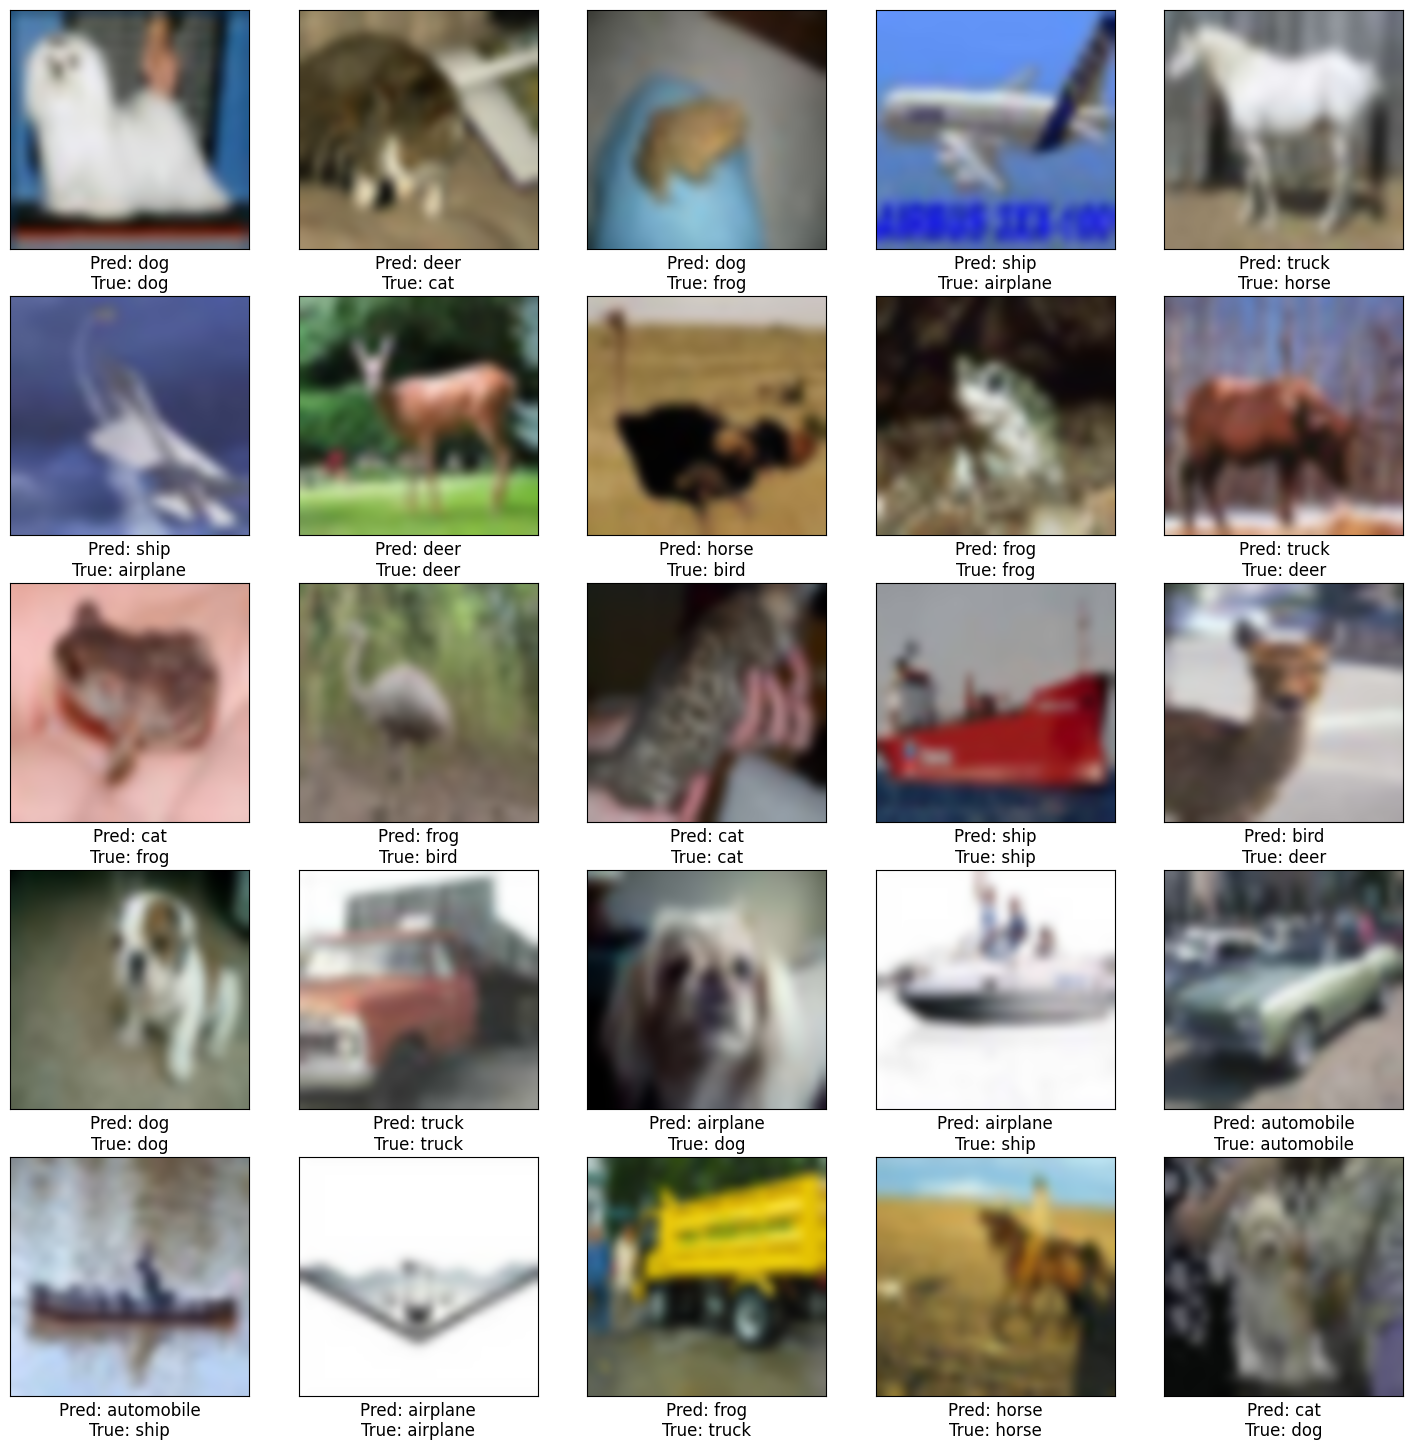

In [18]:
fig, axes = plt.subplots(5, 5, figsize=(18, 18))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[idx[i]].reshape(image_size, image_size, num_channels), interpolation='bicubic')
    pred_class = class_names[y_pred[i]]
    true_class = class_names[y_true[i]]
    ax.set_xlabel('Pred: {}\nTrue: {}'.format(pred_class, true_class), fontsize=12)
    ax.set_xticks([])
    ax.set_yticks([])

# Multi-layer Neural Network

### $$f(x) = W_3 \times \max(W_2 \times \max(0, W_1 x))$$

<img src="imgs/neural_net2.jpeg" width="50%"/>

In [19]:
model = Sequential()

# First hidden Layer
model.add(Dense(units=100, input_shape=(num_features,), activation='relu'))

# Second hidden Layer
model.add(Dense(units=100, activation='relu'))

# Output Layer
model.add(Dense(units=num_classes, activation='softmax'))

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 100)                 │         307,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 318,410 (1.21 MB)

 Trainable params: 318,410 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model

In [21]:
optimizer = keras.optimizers.RMSprop()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(X_train[:num_train], y_train[:num_train],
          batch_size=256,
          epochs=15,
          validation_data=(X_train[num_train:], y_train[num_train:]))

Epoch 1/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.3535 - loss: 1.8088 - val_accuracy: 0.4610 - val_loss: 1.5642
Epoch 2/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4777 - loss: 1.4970 - val_accuracy: 0.4850 - val_loss: 1.4571
Epoch 3/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5061 - loss: 1.4025 - val_accuracy: 0.4890 - val_loss: 1.4827
Epoch 4/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5314 - loss: 1.3321 - val_accuracy: 0.4940 - val_loss: 1.4220
Epoch 5/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5584 - loss: 1.2707 - val_accuracy: 0.5010 - val_loss: 1.3848
Epoch 6/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5724 - loss: 1.2319 - val_accuracy: 0.4990 - val_loss: 1.4179
Epoch 7/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5871 - loss: 1.1852 - val_accuracy: 0.5160 - val_loss: 1.3888
Epoch 8/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6005 - loss: 1.1464 - val_accu

In [23]:
model.save('nn.h5')
# model = keras.models.load_model('nn.h5')

## Adding Dropout and Batch Normalization

In [24]:
from keras.layers import BatchNormalization, Dropout

In [25]:
model = Sequential()

# First Hidden Layer
model.add(Dense(units=100, input_shape=(num_features,)))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Dropout(0.2))

# Second Hidden Layer
model.add(Dense(units=100))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(units=num_classes, activation='softmax'))

# print model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 100)                 │         307,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 319,210 (1.22 MB)

 Trainable params: 318,810 (1.22 MB)

 Non-trainable params: 400 (1.56 KB)

### Training the model

In [26]:
optimizer = keras.optimizers.Adam(learning_rate=0.02, decay=1e-6)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
model.fit(X_train[:num_train], y_train[:num_train],
          batch_size=256,
          epochs=15,
          validation_data=(X_train[num_train:], y_train[num_train:]))

Epoch 1/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.3068 - loss: 1.9426 - val_accuracy: 0.4480 - val_loss: 1.5899
Epoch 2/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.4092 - loss: 1.6400 - val_accuracy: 0.4590 - val_loss: 1.5052
Epoch 3/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.4459 - loss: 1.5553 - val_accuracy: 0.4920 - val_loss: 1.4275
Epoch 4/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.4658 - loss: 1.4987 - val_accuracy: 0.5020 - val_loss: 1.3831
Epoch 5/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.4713 - loss: 1.4709 - val_accuracy: 0.4870 - val_loss: 1.3949
Epoch 6/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.4874 - loss: 1.4334 - val_accuracy: 0.5190 - val_loss: 1.3398
Epoch 7/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.4970 - loss: 1.4098 - val_accuracy: 0.5360 - val_loss: 1.3197
Epoch 8/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.5026 - loss: 1.3804 - val_accu

In [28]:
model.save('nn-dropout-bn.h5')
# model = keras.models.load_model('nn-dropout-bn.h5')

In [29]:
model.evaluate(x_test, y_test, batch_size=256)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5230 - loss: 1.3420


[1.3359715938568115, 0.5250999927520752]

# Convolutional Neural Networks

## Converting dataset to 4D array

In [30]:
X_train = X_train.reshape((-1, image_size, image_size, num_channels))
X_test  =  X_test.reshape((-1, image_size, image_size, num_channels))
x_test  =  x_test.reshape((-1, image_size, image_size, num_channels))

In [31]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [32]:
def create_cnn():
    model = Sequential()

    # Conv Block 1
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Conv Block 2
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Conv Block 3
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Classifier
    model.add(Flatten()) # convert to 2D
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(num_classes, activation='softmax'))

    return model

model = create_cnn()

#print model
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 15, 15, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 6, 6, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,277,898 (4.87 MB)

 Trainable params: 1,277,898 (4.87 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train[:num_train], y_train[:num_train],
          batch_size=200,
          epochs=1,
          validation_data=(X_train[num_train:], y_train[num_train:]))

245/245 ━━━━━━━━━━━━━━━━━━━━ 791s 3s/step - accuracy: 0.2603 - loss: 1.9447 - val_accuracy: 0.5260 - val_loss: 1.2987


## Data Augmentation

In [34]:
model = create_cnn()
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

epochs = 15
batch_size = 256
data_augmentation = True


if not data_augmentation:
    print('Training without data augmentation.')
    model.fit(X_train[:num_train], y_train[:num_train],
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)
else:
    print('Training using real-time data augmentation.')
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=0,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=False)

    datagen.fit(X_train[:num_train])

    model.fit(datagen.flow(X_train[:num_train], y_train[:num_train], batch_size=batch_size),
                        steps_per_epoch=num_train//batch_size,
                        epochs=epochs,
                        validation_data=(X_train[num_train:], y_train[num_train:]))

Training using real-time data augmentation.
Epoch 1/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 820s 4s/step - accuracy: 0.2356 - loss: 2.0205 - val_accuracy: 0.4970 - val_loss: 1.3961
Epoch 2/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.4219 - loss: 1.5051 - val_accuracy: 0.4940 - val_loss: 1.3970
Epoch 3/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 851s 4s/step - accuracy: 0.4663 - loss: 1.4599 - val_accuracy: 0.5950 - val_loss: 1.1403
Epoch 4/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.5547 - loss: 1.3976 - val_accuracy: 0.5720 - val_loss: 1.1914
Epoch 5/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 810s 4s/step - accuracy: 0.5685 - loss: 1.2078 - val_accuracy: 0.6780 - val_loss: 0.9208
Epoch 6/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.6406 - loss: 0.9700 - val_accuracy: 0.6900 - val_loss: 0.9117
Epoch 7/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 803s 4s/step - accuracy: 0.6263 - loss: 1.0549 - val_accuracy: 0.7060 - val_loss: 0.8538
Epoch 8/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step 

### Saving and Loading model

In [36]:
model.save('cnn_data_augmentation.h5')

In [37]:
# model = keras.models.load_model('cnn_data_augmentation.h5')

In [38]:
model.evaluate(x_test, y_test, batch_size=250)

40/40 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7898 - loss: 0.6095


[0.6240121722221375, 0.7843000292778015]